# Plotting cumulative sum of squared errors

## Import libraries

In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os

## Define cell cycle model

In [2]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# input_folder = "Live_fraction_csse/"
input_folder = "Ki67_Basic_fraction_csse/"
# input_folder = "Ki67_Advanced_fraction_csse/"
# input_folder = "Flow_Cytometry_fraction_csse/"
# input_folder = "Separated_Flow_Cytometry_fraction_csse/"

## Define experimental settings

In [3]:
num_files = 9
num_params = 3

settings = np.zeros((num_files, num_params))
settings[0,:] = np.array([0.1, 37, 10])
settings[1,:] = np.array([0.1, 37, 50])
settings[2,:] = np.array([0.1, 100, 10])
settings[3,:] = np.array([0.1, 200, 20])
settings[4,:] = np.array([6, 37, 10])
settings[5,:] = np.array([6, 37, 50])
settings[6,:] = np.array([6, 100, 10])
settings[7,:] = np.array([6, 100, 20])
settings[8,:] = np.array([6, 200, 10])

## Read *.csv* files

In [4]:
def get_filename(settings):
    if settings[0].is_integer():
        return "dt" + str(int(settings[0])) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"
    
    return "dt" + str(settings[0]) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"

In [5]:
data = [None] * num_files
times = [None] * num_files
if cycle_model == 0:
    Ki67_negative_csse = [None] * num_files
    Ki67_positive_premitotic_csse = [None] * num_files
    Ki67_positive_postmitotic_csse = [None] * num_files
elif cycle_model == 1:
    # Ki67_negative_csse = [None] * num_files
    # Ki67_positive_csse = [None] * num_files
    
    tumor_cell_fraction_error = [None] * num_files
elif cycle_model == 2:
    G0G1_phase_csse = [None] * num_files
    S_phase_csse = [None] * num_files
    G2M_phase_csse = [None] * num_files
elif cycle_model == 5:
    live_csse = [None] * num_files
elif cycle_model == 6:
    G0G1_phase_csse = [None] * num_files
    S_phase_csse = [None] * num_files
    G2_phase_csse = [None] * num_files
    M_phase_csse = [None] * num_files
else:
    print("Unrecognized cell cycle model.")

for i in range(num_files):
    data[i] = np.genfromtxt(input_folder + get_filename(settings[i,:]), dtype = float, delimiter = ',', names = True)
    times[i] = data[i]["times"]
    if cycle_model == 0:
        Ki67_negative_csse[i] = data[i]["Ki67_negative_csse"]
        Ki67_positive_premitotic_csse[i] = data[i]["Ki67_positive_premitotic_csse"]
        Ki67_positive_postmitotic_csse[i] = data[i]["Ki67_positive_postmitotic_csse"]
    elif cycle_model == 1:
        # Ki67_negative_csse[i] = data[i]["Ki67_negative_csse"]
        # Ki67_positive_csse[i] = data[i]["Ki67_positive_csse"]
        
        tumor_cell_fraction_error[i] = data[i]["tumor_cell_fraction_error"]
    elif cycle_model == 2:
        G0G1_phase_csse[i] = data[i]["G0G1_phase_csse"]
        S_phase_csse[i] = data[i]["S_phase_csse"]
        G2M_phase_csse[i] = data[i]["G2M_phase_csse"]
    elif cycle_model == 5:
        live_csse[i] = data[i]["live_csse"]
    elif cycle_model == 6:
        G0G1_phase_csse[i] = data[i]["G0G1_phase_csse"]
        S_phase_csse[i] = data[i]["S_phase_csse"]
        G2_phase_csse[i] = data[i]["G2_phase_csse"]
        M_phase_csse[i] = data[i]["M_phase_csse"]
    else:
        print("Unrecognized cell cycle model.")

## Plot cumulative sum of squared errors

In [6]:
def get_label(settings):
    return "dt=" + str(settings[0]) + ", NC=" + str(int(settings[1])) + ", R=" + str(int(settings[2]))

In [7]:
def plot_csse(tumor_cell_fraction_error, cell_cycle_phase_title, cell_cycle_phase_filename):
    plt.clf()
    plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    for i in range(num_files):
        plt.plot(times[i], tumor_cell_fraction_error[i], label = get_label(settings[i,:]), alpha = 1.0, linewidth = 1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if cycle_model == 0:
        plt.ylim((0.0, 0.035))
    elif cycle_model == 1:
        plt.ylim((0.0, 0.06))
    elif cycle_model == 2:
        plt.ylim((0.0, 0.035))
    elif cycle_model == 5:
        plt.ylim((0.0, 0.06))
    elif cycle_model == 6:
        plt.ylim((0.0, 0.04))
    else:
        print("Unrecognized cell cycle model.")

    # plt.title( 'Error comparison for ' + cell_cycle_phase_title, size=20)
    plt.xlabel( 'Time', size=15 ) 
    plt.ylabel( 'Cumulative SSE', size=15 )
    plt.savefig(os.path.join(input_folder, cell_cycle_phase_filename + "_csse.pdf"), bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

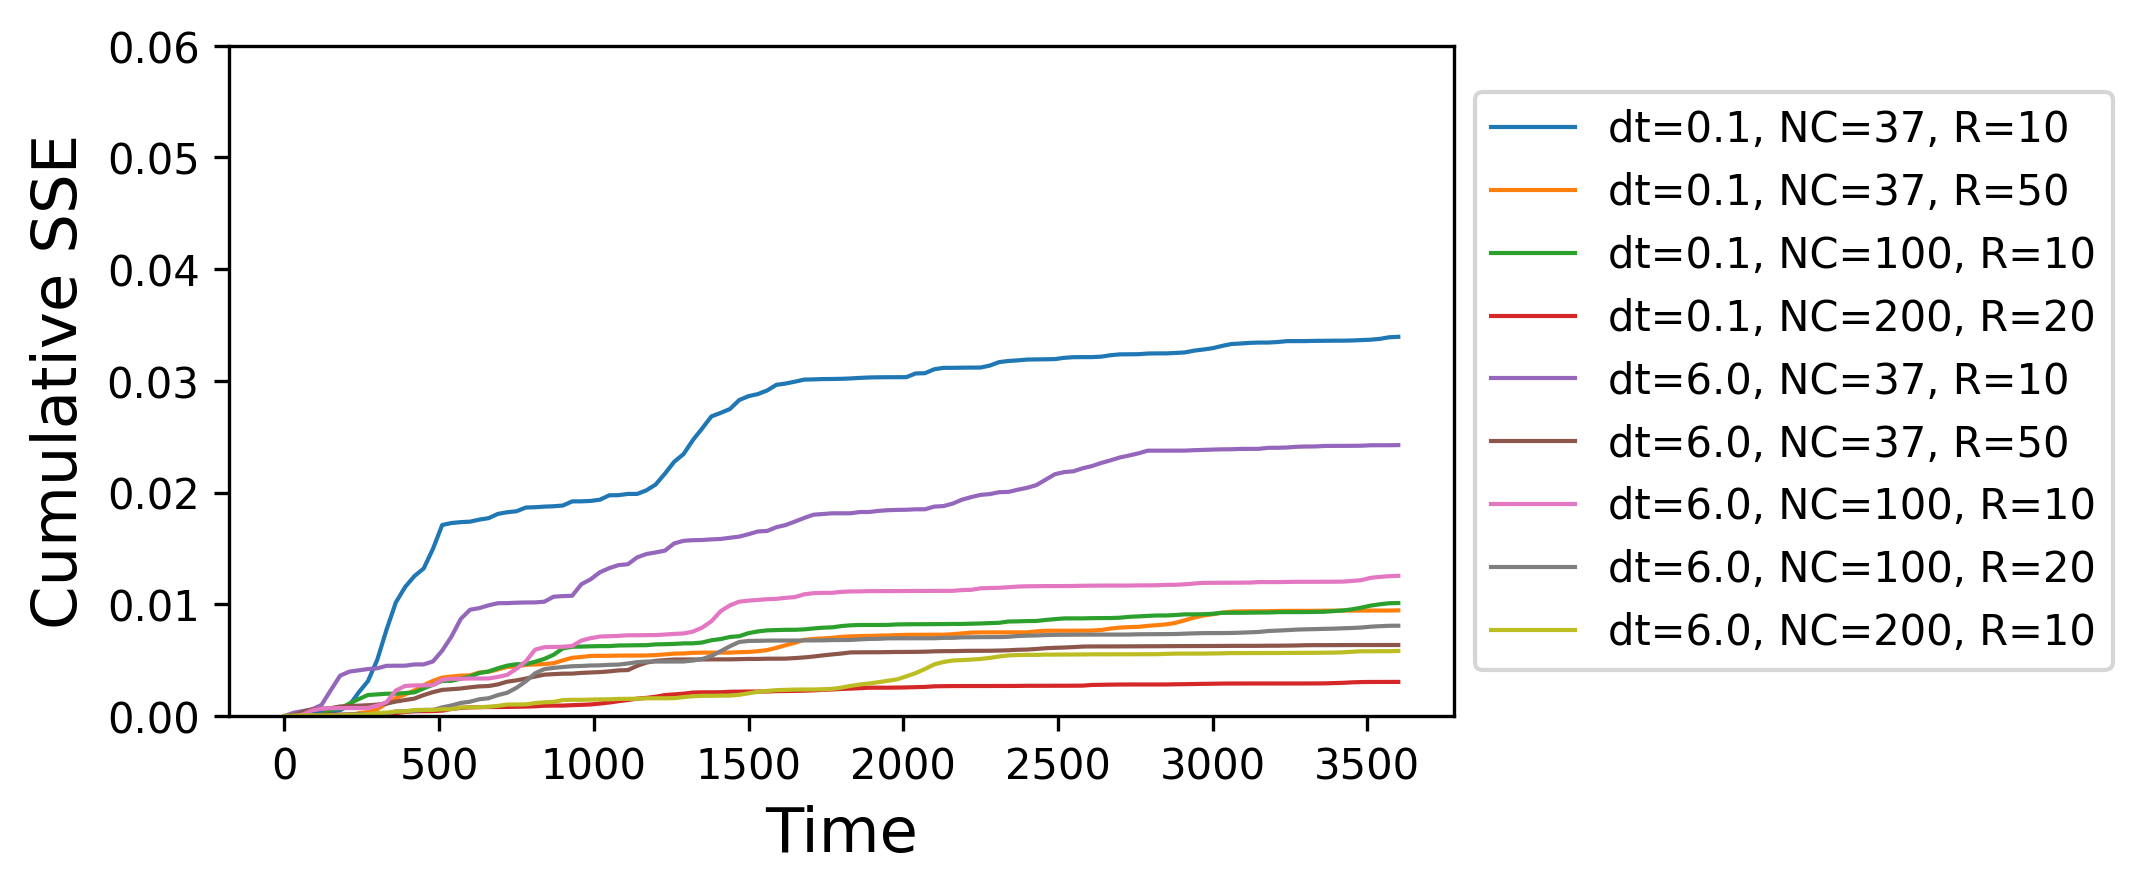

In [8]:
if cycle_model == 0:
    plot_csse(Ki67_negative_csse, r"Ki67$^{-}$", "Ki67_neg")
    plot_csse(Ki67_positive_premitotic_csse, r"Ki67$^{+}$ (pre)", "Ki67_pos_pre")
    plot_csse(Ki67_positive_postmitotic_csse, r"Ki67$^{+}$ (post)", "Ki67_pos_post")
elif cycle_model == 1:
    # plot_csse(Ki67_negative_csse, r"Ki67$^{-}$", "Ki67_neg")
    # plot_csse(Ki67_positive_csse, r"Ki67$^{+}$", "Ki67_pos")
    
    plot_csse(tumor_cell_fraction_error, "Ki67 Basic", "Ki67_Basic")
elif cycle_model == 2:
    plot_csse(G0G1_phase_csse, r"G0/G1", "G0G1_phase")
    plot_csse(S_phase_csse, r"S", "S_phase")
    plot_csse(G2M_phase_csse, r"G2/M", "G2M_phase")
elif cycle_model == 5:
    plot_csse(live_csse, r"Live", "Live")
elif cycle_model == 6:
    plot_csse(G0G1_phase_csse, r"G0/G1", "G0G1_phase")
    plot_csse(S_phase_csse, r"S", "S_phase")
    plot_csse(G2_phase_csse, r"G2", "G2_phase")
    plot_csse(M_phase_csse, r"M", "M_phase")
else:
    print("Unrecognized cell cycle model.")

## Plot sum of squared errors at the final simulation time

<Figure size 432x288 with 0 Axes>

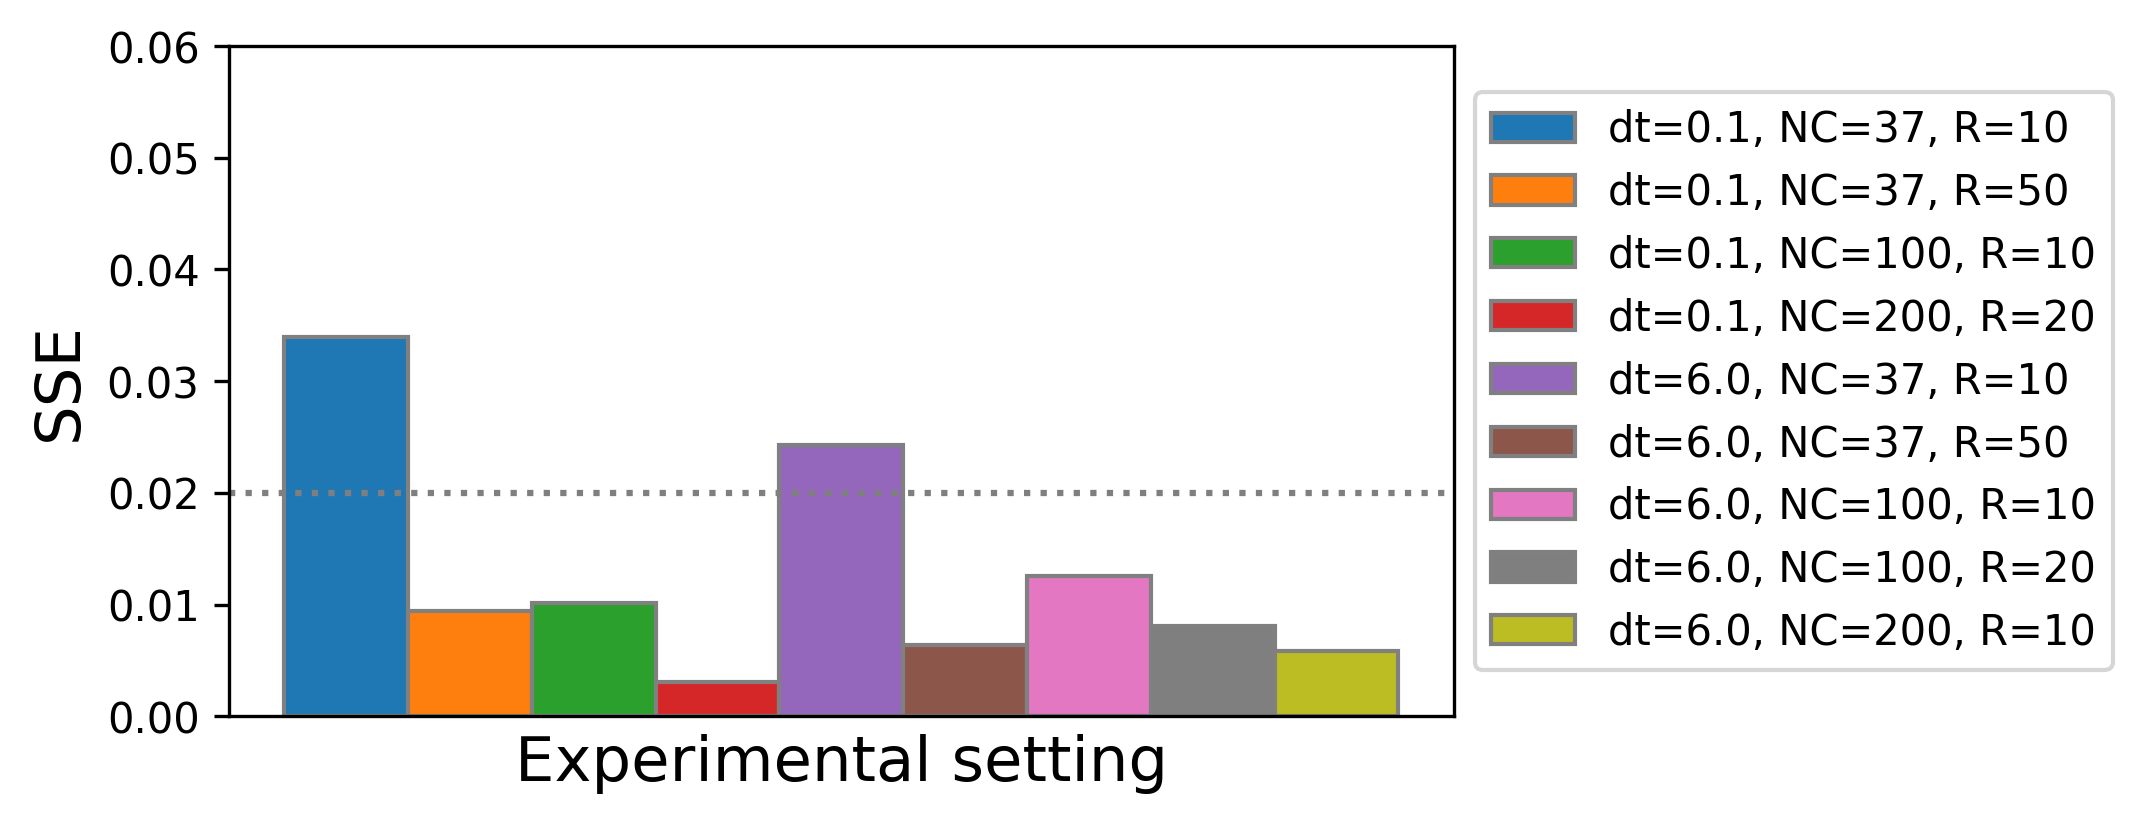

In [9]:
bar_width = 0.1
ticks_factor = 4
threshold = 0.02

tumor_cell_error_data = [None] * num_files
for i in range(num_files):
    if cycle_model == 0:
        tumor_cell_error_data[i] = np.array([Ki67_negative_csse[i][-1], Ki67_positive_premitotic_csse[i][-1], Ki67_positive_postmitotic_csse[i][-1]])
    elif cycle_model == 1:
        # tumor_cell_error_data[i] = np.array([Ki67_negative_csse[i][-1], Ki67_positive_csse[i][-1]])
        
        tumor_cell_error_data[i] = np.array([tumor_cell_fraction_error[i][-1]])
    elif cycle_model == 2:
        tumor_cell_error_data[i] = np.array([G0G1_phase_csse[i][-1], S_phase_csse[i][-1], G2M_phase_csse[i][-1]])
    elif cycle_model == 5:
        tumor_cell_error_data[i] = np.array([live_csse[i][-1]])
    elif cycle_model == 6:
        tumor_cell_error_data[i] = np.array([G0G1_phase_csse[i][-1], S_phase_csse[i][-1], G2_phase_csse[i][-1], M_phase_csse[i][-1]])
    else:
        print("Unrecognized cell cycle model.")
    
bar_pos = [None] * num_files
bar_pos[0] = np.arange(tumor_cell_error_data[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], tumor_cell_error_data[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if cycle_model == 0:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$ (pre)", r"Ki67$^{+}$ (post)"])
    plt.ylim((0.0, 0.035))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 1:
    # plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$"])
    
    plt.xticks([], [])
    plt.ylim((0.0, 0.06))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 2:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2/M"])
    plt.ylim((0.0, 0.035))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 5:
    plt.xticks([], [])
    plt.ylim((0.0, 0.06))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 6:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2", r"M"])
    plt.ylim((0.0, 0.04))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Error comparison at t=' + str(times[0][-1]) + " min", size=20)
plt.ylabel( 'SSE', size=15 )
plt.savefig(os.path.join(input_folder, "sse_bar.pdf"), bbox_inches = 'tight')

## Plot mean squared error at the final simulation time

<Figure size 432x288 with 0 Axes>

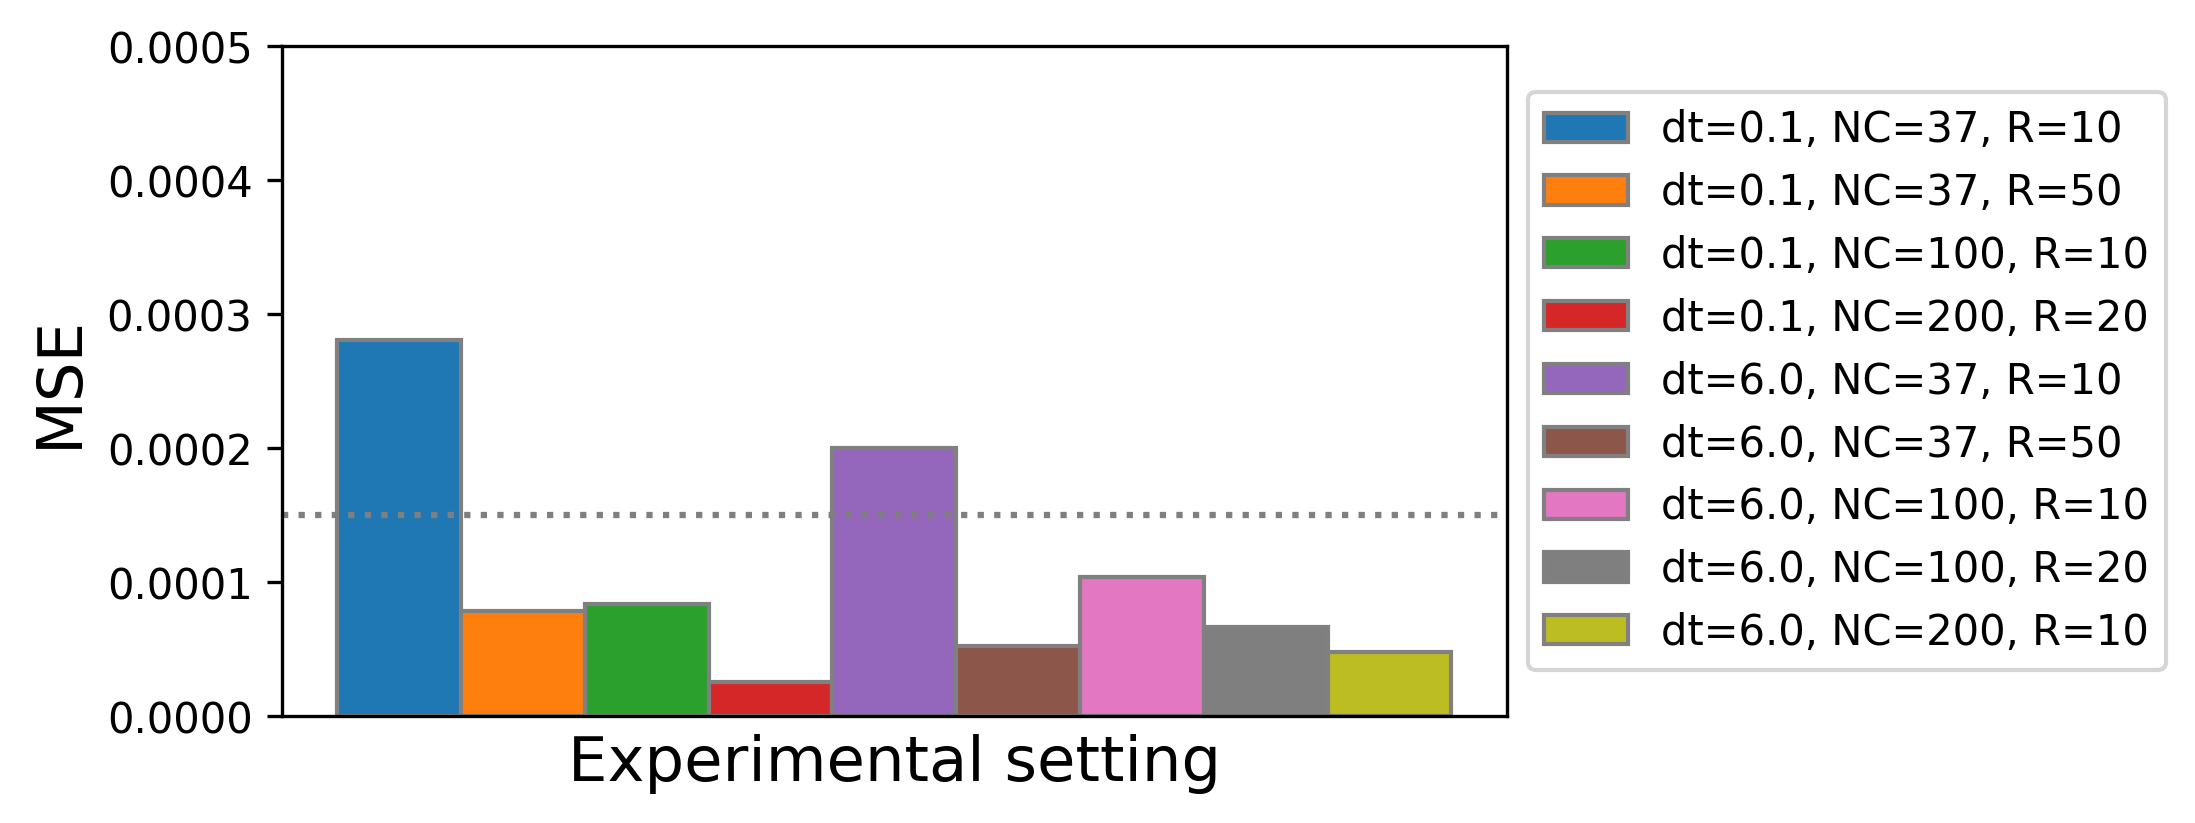

In [10]:
bar_width = 0.1
ticks_factor = 4
threshold = 0.00015

tumor_cell_error_data = [None] * num_files
for i in range(num_files):
    if cycle_model == 0:
        tumor_cell_error_data[i] = np.array([Ki67_negative_csse[i][-1]/len(times[i]), Ki67_positive_premitotic_csse[i][-1]/len(times[i]), Ki67_positive_postmitotic_csse[i][-1]/len(times[i])])
    elif cycle_model == 1:
        # tumor_cell_error_data[i] = np.array([Ki67_negative_csse[i][-1]/len(times[i]), Ki67_positive_csse[i][-1]/len(times[i])])
        
        tumor_cell_error_data[i] = np.array([tumor_cell_fraction_error[i][-1]/len(times[i])])
    elif cycle_model == 2:
        tumor_cell_error_data[i] = np.array([G0G1_phase_csse[i][-1]/len(times[i]), S_phase_csse[i][-1]/len(times[i]), G2M_phase_csse[i][-1]/len(times[i])])
    elif cycle_model == 5:
        tumor_cell_error_data[i] = np.array([live_csse[i][-1]/len(times[i])])
    elif cycle_model == 6:
        tumor_cell_error_data[i] = np.array([G0G1_phase_csse[i][-1]/len(times[i]), S_phase_csse[i][-1]/len(times[i]), G2_phase_csse[i][-1]/len(times[i]), M_phase_csse[i][-1]/len(times[i])])
    else:
        print("Unrecognized cell cycle model.")
    
bar_pos = [None] * num_files
bar_pos[0] = np.arange(tumor_cell_error_data[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], tumor_cell_error_data[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if cycle_model == 0:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$ (pre)", r"Ki67$^{+}$ (post)"])
    plt.ylim((0.0, 0.0003))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 1:
    # plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$"])
    
    plt.xticks([], [])
    plt.ylim((0.0, 0.0005))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 2:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2/M"])
    plt.ylim((0.0, 0.0003))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 5:
    plt.xticks([], [])
    plt.ylim((0.0, 0.0005))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 6:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2", r"M"])
    plt.ylim((0.0, 0.00035))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Error comparison at t=' + str(times[0][-1]) + " min", size=20)
plt.ylabel( 'MSE', size=15 )
plt.savefig(os.path.join(input_folder, "mse_bar.pdf"), bbox_inches = 'tight')

# Plotting absolute error

## Define cell cycle model

In [12]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# input_folder = "Live_fraction_abs/"
input_folder = "Ki67_Basic_fraction_abs/"
# input_folder = "Ki67_Advanced_fraction_abs/"
# input_folder = "Flow_Cytometry_fraction_abs/"
# input_folder = "Separated_Flow_Cytometry_fraction_abs/"

## Define experimental settings

In [13]:
num_files = 9
num_params = 3

settings = np.zeros((num_files, num_params))
settings[0,:] = np.array([0.1, 37, 10])
settings[1,:] = np.array([0.1, 37, 50])
settings[2,:] = np.array([0.1, 100, 10])
settings[3,:] = np.array([0.1, 200, 20])
settings[4,:] = np.array([6, 37, 10])
settings[5,:] = np.array([6, 37, 50])
settings[6,:] = np.array([6, 100, 10])
settings[7,:] = np.array([6, 100, 20])
settings[8,:] = np.array([6, 200, 10])

## Read *.csv* files

In [14]:
def get_filename(settings):
    if settings[0].is_integer():
        return "dt" + str(int(settings[0])) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"
    
    return "dt" + str(settings[0]) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"

In [15]:
data = [None] * num_files
times = [None] * num_files
if cycle_model == 0:
    Ki67_negative_absolute_error = [None] * num_files
    Ki67_positive_premitotic_absolute_error = [None] * num_files
    Ki67_positive_postmitotic_absolute_error = [None] * num_files
elif cycle_model == 1:
    # Ki67_negative_absolute_error = [None] * num_files
    # Ki67_positive_absolute_error = [None] * num_files
    
    tumor_cell_fraction_error = [None] * num_files
elif cycle_model == 2:
    G0G1_phase_absolute_error = [None] * num_files
    S_phase_absolute_error = [None] * num_files
    G2M_phase_absolute_error = [None] * num_files
elif cycle_model == 5:
    live_absolute_error = [None] * num_files
elif cycle_model == 6:
    G0G1_phase_absolute_error = [None] * num_files
    S_phase_absolute_error = [None] * num_files
    G2_phase_absolute_error = [None] * num_files
    M_phase_absolute_error = [None] * num_files
else:
    print("Unrecognized cell cycle model.")

for i in range(num_files):
    data[i] = np.genfromtxt(input_folder + get_filename(settings[i,:]), dtype = float, delimiter = ',', names = True)
    times[i] = data[i]["times"]
    if cycle_model == 0:
        Ki67_negative_absolute_error[i] = data[i]["Ki67_negative_absolute_error"]
        Ki67_positive_premitotic_absolute_error[i] = data[i]["Ki67_positive_premitotic_absolute_error"]
        Ki67_positive_postmitotic_absolute_error[i] = data[i]["Ki67_positive_postmitotic_absolute_error"]
    elif cycle_model == 1:
        # Ki67_negative_absolute_error[i] = data[i]["Ki67_negative_absolute_error"]
        # Ki67_positive_absolute_error[i] = data[i]["Ki67_positive_absolute_error"]
        
        tumor_cell_fraction_error[i] = data[i]["tumor_cell_fraction_error"]
    elif cycle_model == 2:
        G0G1_phase_absolute_error[i] = data[i]["G0G1_phase_absolute_error"]
        S_phase_absolute_error[i] = data[i]["S_phase_absolute_error"]
        G2M_phase_absolute_error[i] = data[i]["G2M_phase_absolute_error"]
    elif cycle_model == 5:
        live_absolute_error[i] = data[i]["live_absolute_error"]
    elif cycle_model == 6:
        G0G1_phase_absolute_error[i] = data[i]["G0G1_phase_absolute_error"]
        S_phase_absolute_error[i] = data[i]["S_phase_absolute_error"]
        G2_phase_absolute_error[i] = data[i]["G2_phase_absolute_error"]
        M_phase_absolute_error[i] = data[i]["M_phase_absolute_error"]
    else:
        print("Unrecognized cell cycle model.")

## Plot absolute error

In [16]:
def get_label(settings):
    return "dt=" + str(settings[0]) + ", NC=" + str(int(settings[1])) + ", R=" + str(int(settings[2]))

In [17]:
def plot_abs(tumor_cell_fraction_error, cell_cycle_phase_title, cell_cycle_phase_filename):
    plt.clf()
    plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    for i in range(num_files):
        plt.plot(times[i], tumor_cell_fraction_error[i], label = get_label(settings[i,:]), alpha = 1.0, linewidth = 1)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if cycle_model == 0:
        plt.ylim((0.0, 1.6))
    elif cycle_model == 1:
        plt.ylim((0.0, 2.0))
    elif cycle_model == 2:
        plt.ylim((0.0, 1.6))
    elif cycle_model == 5:
        plt.ylim((0.0, 2.0))
    elif cycle_model == 6:
        plt.ylim((0.0, 1.75))
    else:
        print("Unrecognized cell cycle model.")

    # plt.title( 'Error comparison for ' + cell_cycle_phase_title, size=20)
    plt.xlabel( 'Time', size=15 ) 
    plt.ylabel( 'Cumulative SAE', size=15 )
    plt.savefig(os.path.join(input_folder, cell_cycle_phase_filename + "_abs.pdf"), bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

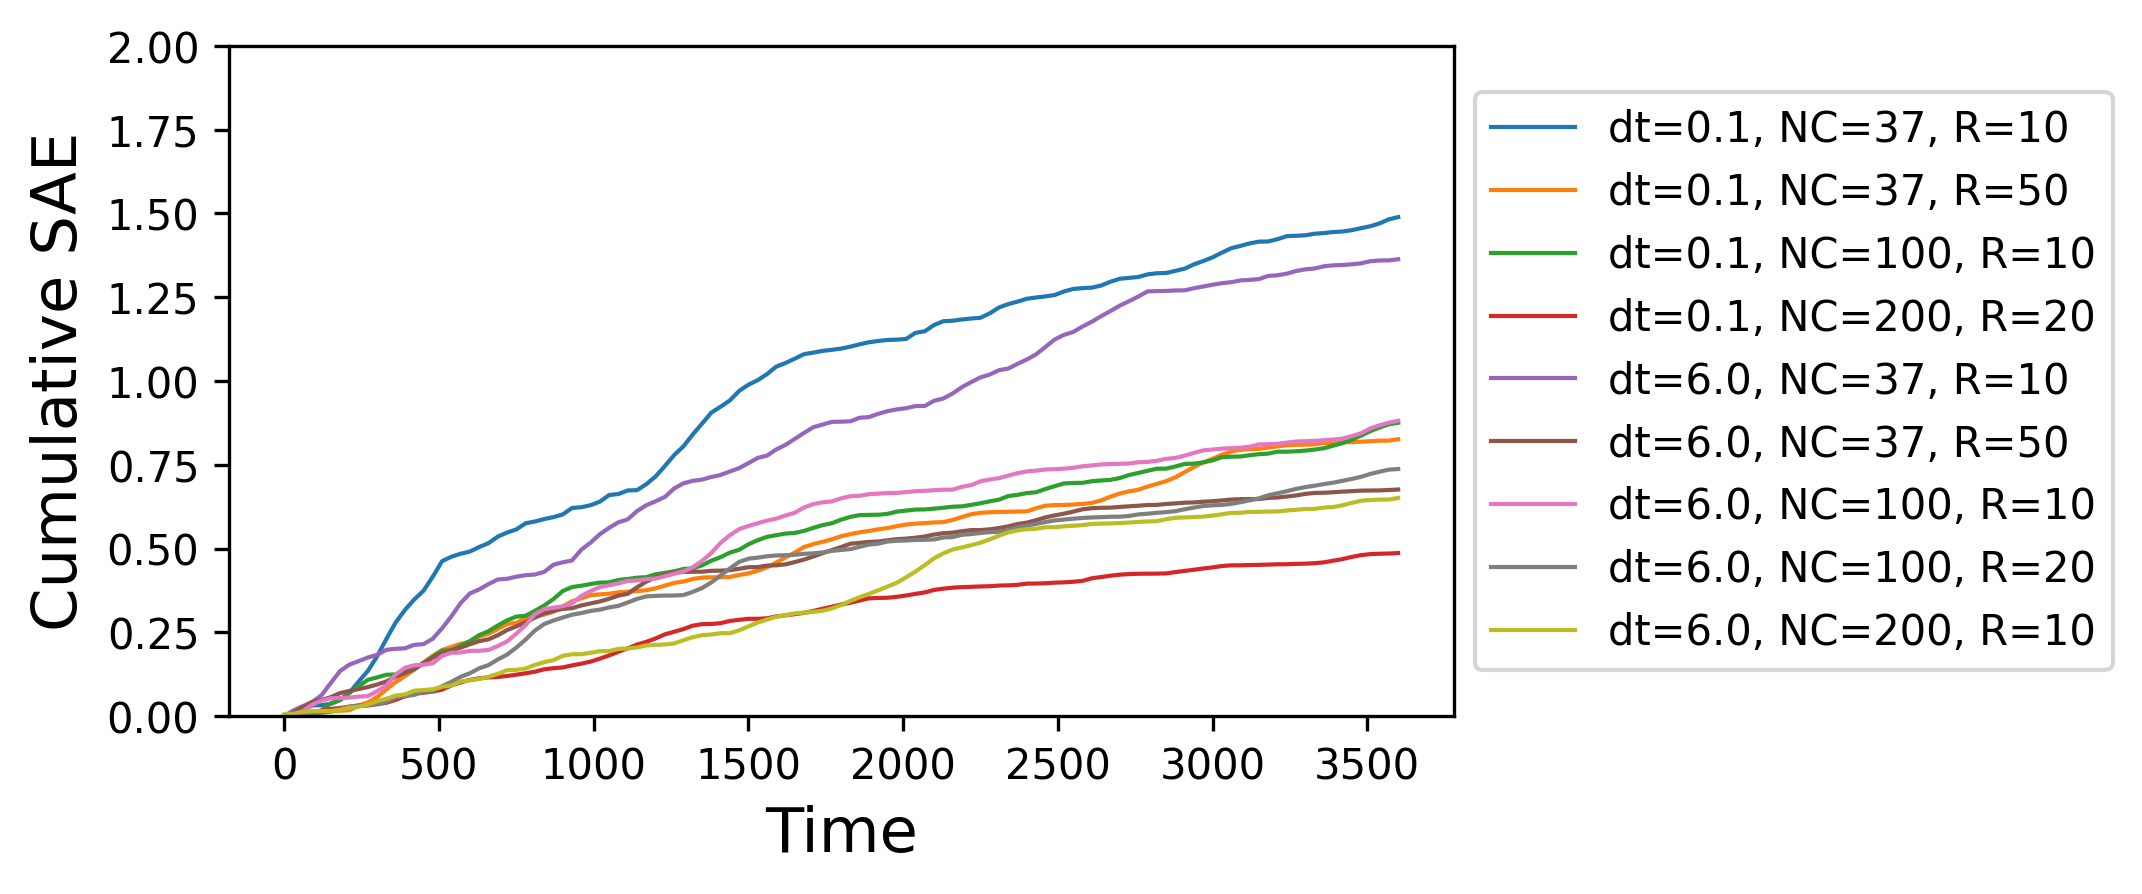

In [18]:
if cycle_model == 0:
    plot_abs(Ki67_negative_absolute_error, r"Ki67$^{-}$", "Ki67_neg")
    plot_abs(Ki67_positive_premitotic_absolute_error, r"Ki67$^{+}$ (pre)", "Ki67_pos_pre")
    plot_abs(Ki67_positive_postmitotic_absolute_error, r"Ki67$^{+}$ (post)", "Ki67_pos_post")
elif cycle_model == 1:
    # plot_abs(Ki67_negative_absolute_error, r"Ki67$^{-}$", "Ki67_neg")
    # plot_abs(Ki67_positive_absolute_error, r"Ki67$^{+}$", "Ki67_pos")
    
    plot_abs(tumor_cell_fraction_error, "Ki67 Basic", "Ki67_Basic")
elif cycle_model == 2:
    plot_abs(G0G1_phase_absolute_error, r"G0/G1", "G0G1_phase")
    plot_abs(S_phase_absolute_error, r"S", "S_phase")
    plot_abs(G2M_phase_absolute_error, r"G2/M", "G2M_phase")
elif cycle_model == 5:
    plot_abs(live_absolute_error, r"Live", "Live")
elif cycle_model == 6:
    plot_abs(G0G1_phase_absolute_error, r"G0/G1", "G0G1_phase")
    plot_abs(S_phase_absolute_error, r"S", "S_phase")
    plot_abs(G2_phase_absolute_error, r"G2", "G2_phase")
    plot_abs(M_phase_absolute_error, r"M", "M_phase")
else:
    print("Unrecognized cell cycle model.")

## Plot absolute error at the final simulation time

<Figure size 432x288 with 0 Axes>

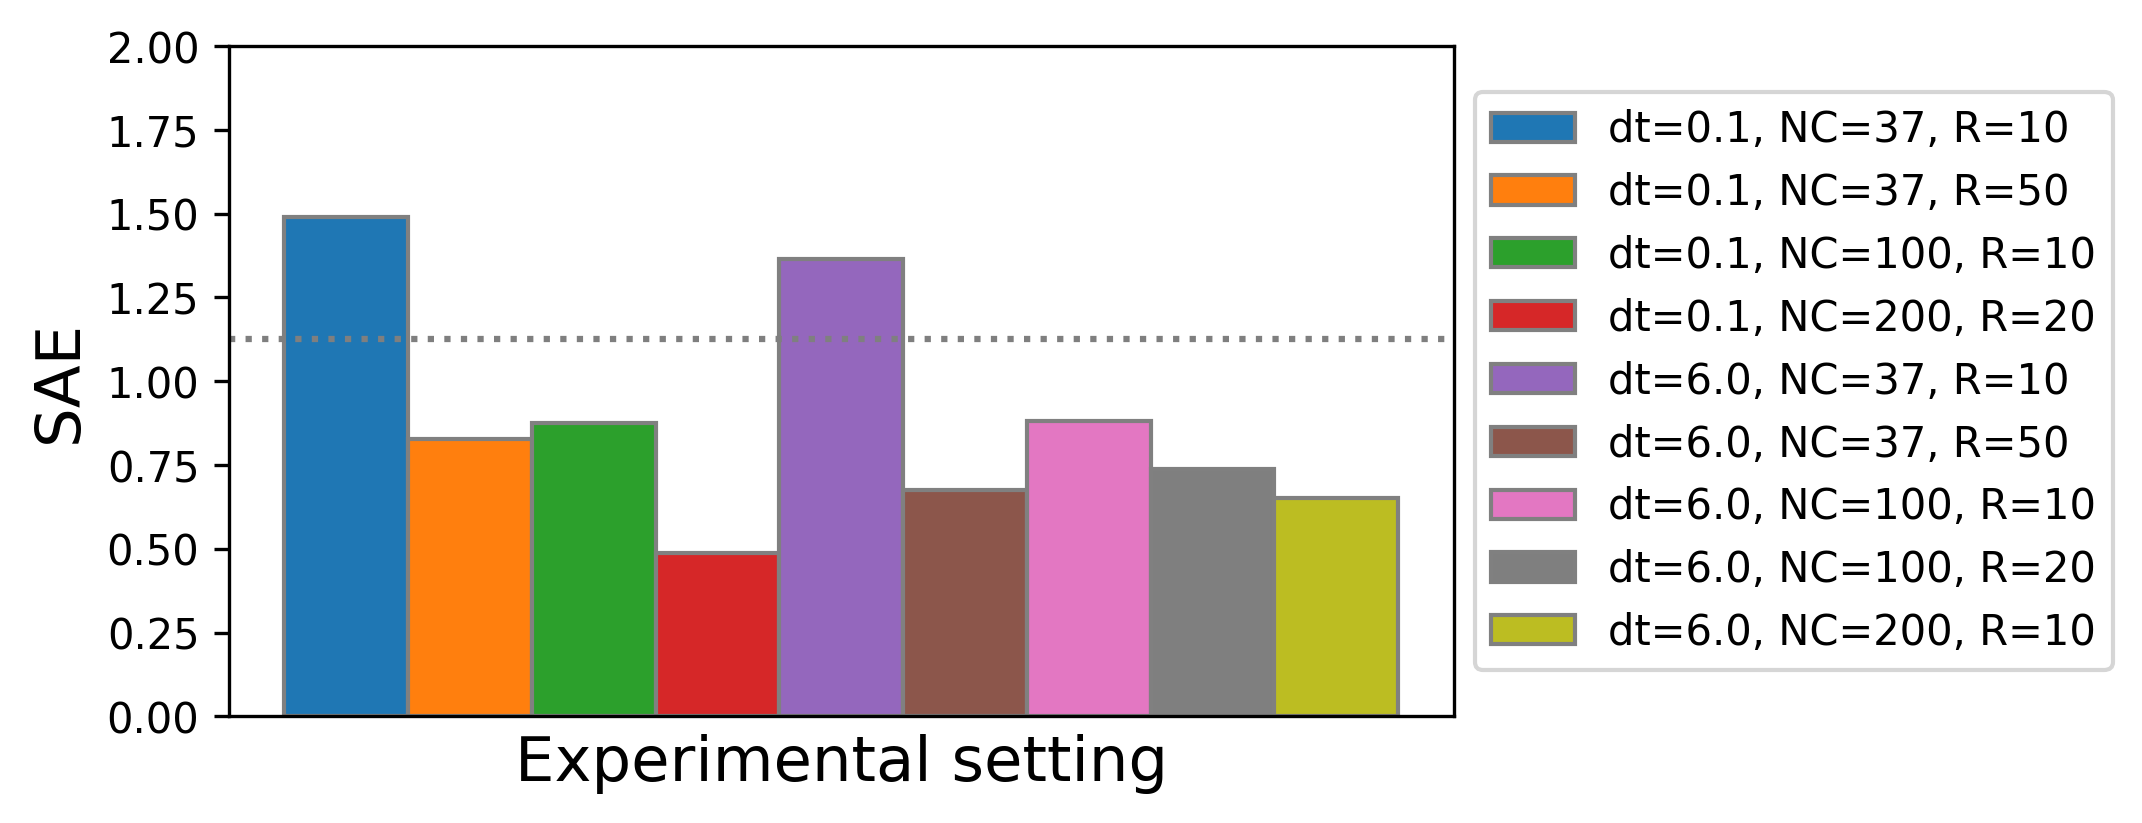

In [19]:
bar_width = 0.1
ticks_factor = 4
threshold = 1.125

tumor_cell_error_data = [None] * num_files
for i in range(num_files):
    if cycle_model == 0:
        tumor_cell_error_data[i] = np.array([Ki67_negative_absolute_error[i][-1], Ki67_positive_premitotic_absolute_error[i][-1], Ki67_positive_postmitotic_absolute_error[i][-1]])
    elif cycle_model == 1:
        # tumor_cell_error_data[i] = np.array([Ki67_negative_absolute_error[i][-1], Ki67_positive_absolute_error[i][-1]])
        
        tumor_cell_error_data[i] = np.array([tumor_cell_fraction_error[i][-1]])
    elif cycle_model == 2:
        tumor_cell_error_data[i] = np.array([G0G1_phase_absolute_error[i][-1], S_phase_absolute_error[i][-1], G2M_phase_absolute_error[i][-1]])
    elif cycle_model == 5:
        tumor_cell_error_data[i] = np.array([live_absolute_error[i][-1]])
    elif cycle_model == 6:
        tumor_cell_error_data[i] = np.array([G0G1_phase_absolute_error[i][-1], S_phase_absolute_error[i][-1], G2_phase_absolute_error[i][-1], M_phase_absolute_error[i][-1]])
    else:
        print("Unrecognized cell cycle model.")
    
bar_pos = [None] * num_files
bar_pos[0] = np.arange(tumor_cell_error_data[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], tumor_cell_error_data[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if cycle_model == 0:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$ (pre)", r"Ki67$^{+}$ (post)"])
    plt.ylim((0.0, 1.6))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 1:
    # plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$"])
    
    plt.xticks([], [])
    plt.ylim((0.0, 2.0))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 2:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2/M"])
    plt.ylim((0.0, 1.6))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 5:
    plt.xticks([], [])
    plt.ylim((0.0, 2.0))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 6:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2", r"M"])
    plt.ylim((0.0, 1.75))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Error comparison at t=' + str(times[0][-1]) + " min", size=20)
plt.ylabel( 'SAE', size=15 )
plt.savefig(os.path.join(input_folder, "sae_bar.pdf"), bbox_inches = 'tight')

## Plot mean absolute error at the final simulation time

<Figure size 432x288 with 0 Axes>

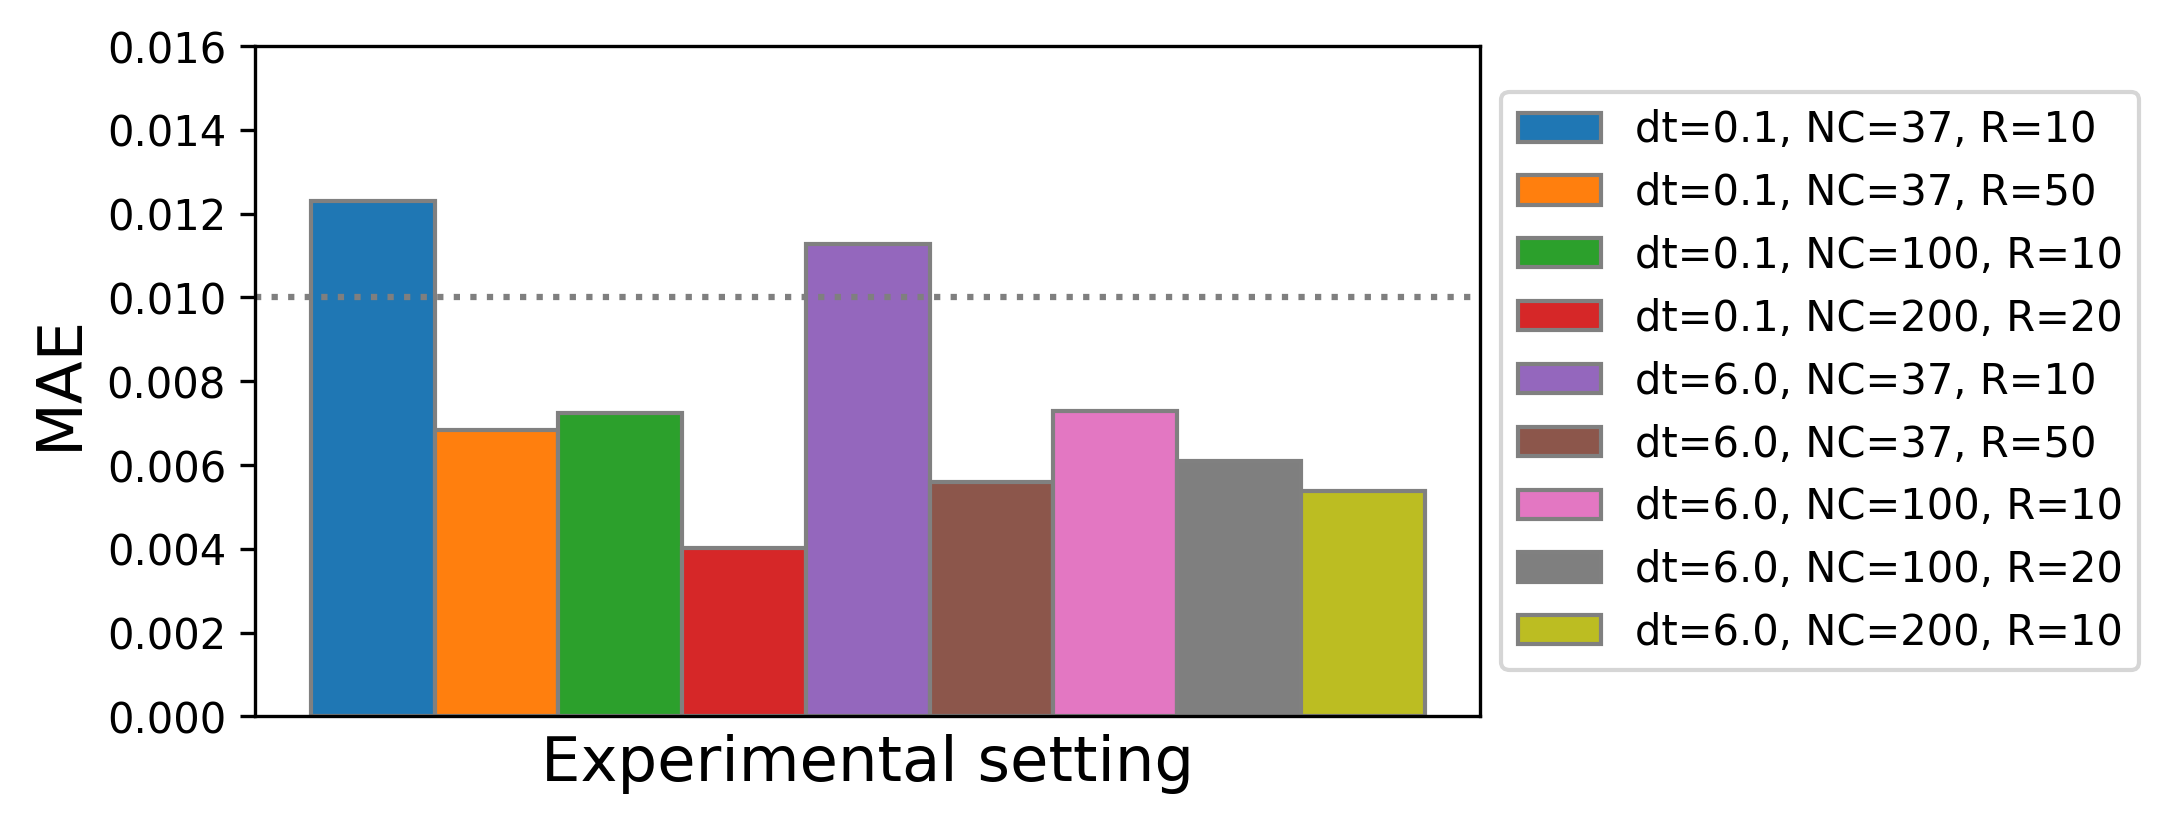

In [20]:
bar_width = 0.1
ticks_factor = 4
threshold = 0.01

tumor_cell_error_data = [None] * num_files
for i in range(num_files):
    if cycle_model == 0:
        tumor_cell_error_data[i] = np.array([Ki67_negative_absolute_error[i][-1]/len(times[i]), Ki67_positive_premitotic_absolute_error[i][-1]/len(times[i]), Ki67_positive_postmitotic_absolute_error[i][-1]/len(times[i])])
    elif cycle_model == 1:
        # tumor_cell_error_data[i] = np.array([Ki67_negative_absolute_error[i][-1]/len(times[i]), Ki67_positive_absolute_error[i][-1]/len(times[i])])
        
        tumor_cell_error_data[i] = np.array([tumor_cell_fraction_error[i][-1]/len(times[i])])
    elif cycle_model == 2:
        tumor_cell_error_data[i] = np.array([G0G1_phase_absolute_error[i][-1]/len(times[i]), S_phase_absolute_error[i][-1]/len(times[i]), G2M_phase_absolute_error[i][-1]/len(times[i])])
    elif cycle_model == 5:
        tumor_cell_error_data[i] = np.array([live_absolute_error[i][-1]/len(times[i])])
    elif cycle_model == 6:
        tumor_cell_error_data[i] = np.array([G0G1_phase_absolute_error[i][-1]/len(times[i]), S_phase_absolute_error[i][-1]/len(times[i]), G2_phase_absolute_error[i][-1]/len(times[i]), M_phase_absolute_error[i][-1]/len(times[i])])
    else:
        print("Unrecognized cell cycle model.")
    
bar_pos = [None] * num_files
bar_pos[0] = np.arange(tumor_cell_error_data[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], tumor_cell_error_data[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if cycle_model == 0:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$ (pre)", r"Ki67$^{+}$ (post)"])
    plt.ylim((0.0, 0.012))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 1:
    # plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$"])
    
    plt.xticks([], [])
    plt.ylim((0.0, 0.016))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 2:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2/M"])
    plt.ylim((0.0, 0.012))
    plt.xlabel( 'ECell cycle phase', size=15 ) 
elif cycle_model == 5:
    plt.xticks([], [])
    plt.ylim((0.0, 0.016))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 6:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2", r"M"])
    plt.ylim((0.0, 0.014))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Error comparison at t=' + str(times[0][-1]) + " min", size=20)
plt.ylabel( 'MAE', size=15 )
plt.savefig(os.path.join(input_folder, "mae_bar.pdf"), bbox_inches = 'tight')

# Plotting squared error

## Define cell cycle model

In [21]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 1

# input_folder = "Live_fraction_sqr/"
input_folder = "Ki67_Basic_fraction_sqr/"
# input_folder = "Ki67_Advanced_fraction_sqr/"
# input_folder = "Flow_Cytometry_fraction_sqr/"
# input_folder = "Separated_Flow_Cytometry_fraction_sqr/"

## Define experimental settings

In [22]:
num_files = 9
num_params = 3

settings = np.zeros((num_files, num_params))
settings[0,:] = np.array([0.1, 37, 10])
settings[1,:] = np.array([0.1, 37, 50])
settings[2,:] = np.array([0.1, 100, 10])
settings[3,:] = np.array([0.1, 200, 20])
settings[4,:] = np.array([6, 37, 10])
settings[5,:] = np.array([6, 37, 50])
settings[6,:] = np.array([6, 100, 10])
settings[7,:] = np.array([6, 100, 20])
settings[8,:] = np.array([6, 200, 10])

## Read *.csv* files

In [23]:
def get_filename(settings):
    if settings[0].is_integer():
        return "dt" + str(int(settings[0])) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"
    
    return "dt" + str(settings[0]) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + ".csv"

In [24]:
data = [None] * num_files
if cycle_model == 0:
    Ki67_negative_squared_error = [None] * num_files
    Ki67_positive_premitotic_squared_error = [None] * num_files
    Ki67_positive_postmitotic_squared_error = [None] * num_files
elif cycle_model == 1:
    # Ki67_negative_squared_error = [None] * num_files
    # Ki67_positive_squared_error = [None] * num_files
    
    tumor_cell_fraction_error = [None] * num_files
elif cycle_model == 2:
    G0G1_phase_squared_error = [None] * num_files
    S_phase_squared_error = [None] * num_files
    G2M_phase_squared_error = [None] * num_files
elif cycle_model == 5:
    live_squared_error = [None] * num_files
elif cycle_model == 6:
    G0G1_phase_squared_error = [None] * num_files
    S_phase_squared_error = [None] * num_files
    G2_phase_squared_error = [None] * num_files
    M_phase_squared_error = [None] * num_files
else:
    print("Unrecognized cell cycle model.")

for i in range(num_files):
    data[i] = np.genfromtxt(input_folder + get_filename(settings[i,:]), dtype = float, delimiter = ',', names = True)
    if cycle_model == 0:
        Ki67_negative_squared_error[i] = data[i]["Ki67_negative_squared_error"]
        Ki67_positive_premitotic_squared_error[i] = data[i]["Ki67_positive_premitotic_squared_error"]
        Ki67_positive_postmitotic_squared_error[i] = data[i]["Ki67_positive_postmitotic_squared_error"]
    elif cycle_model == 1:
        # Ki67_negative_squared_error[i] = data[i]["Ki67_negative_squared_error"]
        # Ki67_positive_squared_error[i] = data[i]["Ki67_positive_squared_error"]
        
        tumor_cell_fraction_error[i] = data[i]["tumor_cell_fraction_error"]
    elif cycle_model == 2:
        G0G1_phase_squared_error[i] = data[i]["G0G1_phase_squared_error"]
        S_phase_squared_error[i] = data[i]["S_phase_squared_error"]
        G2M_phase_squared_error[i] = data[i]["G2M_phase_squared_error"]
    elif cycle_model == 5:
        live_squared_error[i] = data[i]["live_squared_error"]
    elif cycle_model == 6:
        G0G1_phase_squared_error[i] = data[i]["G0G1_phase_squared_error"]
        S_phase_squared_error[i] = data[i]["S_phase_squared_error"]
        G2_phase_squared_error[i] = data[i]["G2_phase_squared_error"]
        M_phase_squared_error[i] = data[i]["M_phase_squared_error"]
    else:
        print("Unrecognized cell cycle model.")

## Plot squared error at the final simulation time

In [25]:
def get_label(settings):
    return "dt=" + str(settings[0]) + ", NC=" + str(int(settings[1])) + ", R=" + str(int(settings[2]))

<Figure size 432x288 with 0 Axes>

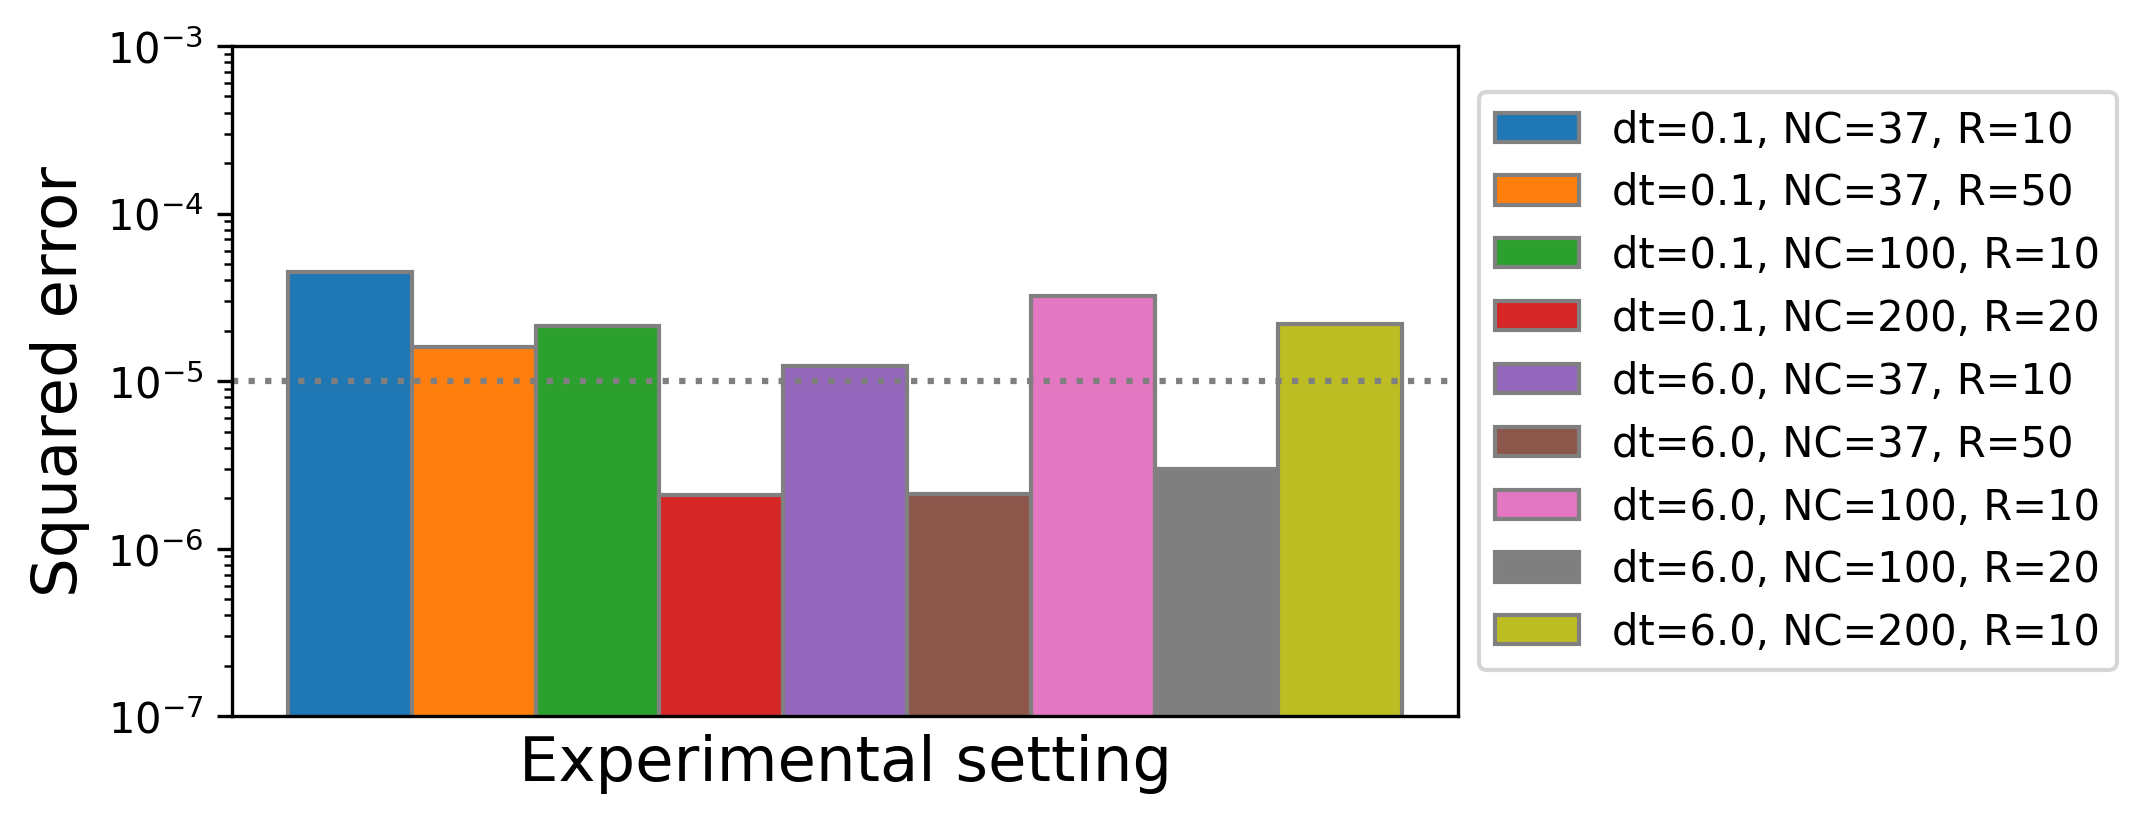

In [26]:
bar_width = 0.1
ticks_factor = 4
threshold = 1.0e-5

tumor_cell_error_data = [None] * num_files
for i in range(num_files):
    if cycle_model == 0:
        tumor_cell_error_data[i] = np.array([Ki67_negative_squared_error[i], Ki67_positive_premitotic_squared_error[i], Ki67_positive_postmitotic_squared_error[i]])
    elif cycle_model == 1:
        # tumor_cell_error_data[i] = np.array([Ki67_negative_squared_error[i], Ki67_positive_squared_error[i]])
        
        tumor_cell_error_data[i] = np.array([tumor_cell_fraction_error[i]])
    elif cycle_model == 2:
        tumor_cell_error_data[i] = np.array([G0G1_phase_squared_error[i], S_phase_squared_error[i], G2M_phase_squared_error[i]])
    elif cycle_model == 5:
        tumor_cell_error_data[i] = np.array([live_squared_error[i]])
    elif cycle_model == 6:
        tumor_cell_error_data[i] = np.array([G0G1_phase_squared_error[i], S_phase_squared_error[i], G2_phase_squared_error[i], M_phase_squared_error[i]])
    else:
        print("Unrecognized cell cycle model.")
    
bar_pos = [None] * num_files
bar_pos[0] = np.arange(tumor_cell_error_data[0].size)
for i in range(1, num_files):
    bar_pos[i] = [x + bar_width for x in bar_pos[i-1]]
    
plt.clf()
plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
for i in range(num_files):
    plt.bar(bar_pos[i], tumor_cell_error_data[i], width=bar_width, edgecolor='grey', label=get_label(settings[i,:]))
plt.axhline( threshold, color='tab:gray', linestyle=':' );
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

if cycle_model == 0:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$ (pre)", r"Ki67$^{+}$ (post)"])
    plt.ylim((1.0e-8, 1.0e-3))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 1:
    # plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"Ki67$^{-}$", r"Ki67$^{+}$"])
    
    plt.xticks([], [])
    plt.ylim((1.0e-7, 1.0e-3))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 2:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2/M"])
    plt.ylim((1.0e-8, 1.0e-3))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
elif cycle_model == 5:
    plt.xticks([], [])
    plt.ylim((1.0e-7, 1.0e-3))
    plt.xlabel( 'Experimental setting', size=15 ) 
elif cycle_model == 6:
    plt.xticks([r + ticks_factor*bar_width for r in range(tumor_cell_error_data[0].size)], [r"G0/G1", r"S", r"G2", r"M"])
    plt.ylim((1.0e-7, 1.0e-3))
    plt.xlabel( 'Cell cycle phase', size=15 ) 
else:
    print("Unrecognized cell cycle model.")

# plt.title( 'Error comparison at the final simulation time', size=20)
plt.ylabel( 'Squared error', size=15 )
plt.yscale( 'log' )
plt.savefig(os.path.join(input_folder, "sqr_bar.pdf"), bbox_inches = 'tight')